In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv('Mall_Customers.csv')

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
x = df[['Annual Income (k$)','Spending Score (1-100)']].values


In [14]:
wcss  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)





Text(0, 0.5, 'Wcss')

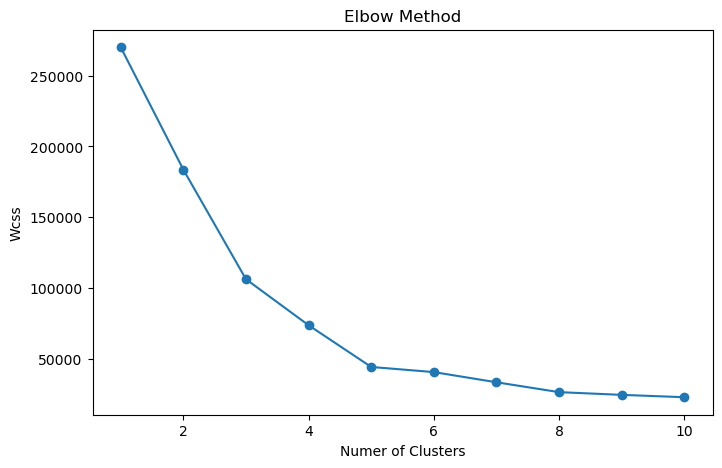

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker ='o')
plt.title('Elbow Method')
plt.xlabel('Numer of Clusters')
plt.ylabel('Wcss')

In [20]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(x)

In [21]:
score = silhouette_score(x,y_kmeans)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.55


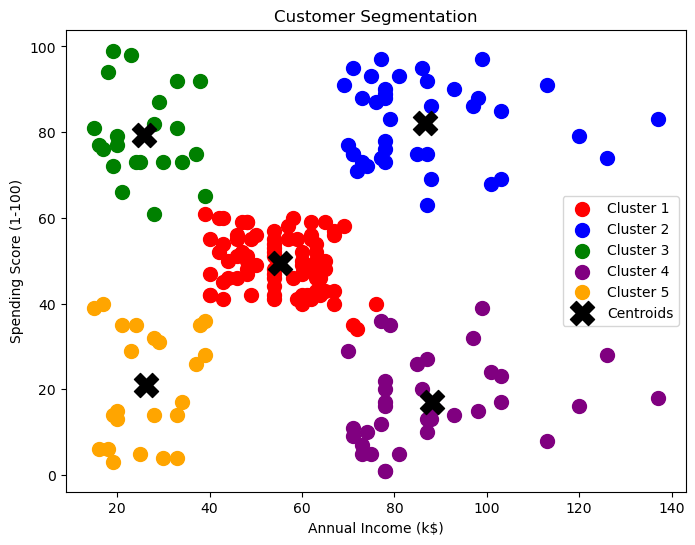

In [23]:
plt.figure(figsize=(8, 6))

# Scatter plot of clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()
